<a href="https://colab.research.google.com/github/romanzes637/tensor/blob/master/polar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For visual representation follow youtube channel:
https://www.youtube.com/user/EugeneKhutoryansky/featured


$
r - vector\\
x - Cartesian\ (global)\ coordinates\\
q - curvilinear\ (local)\ coordinates\\
f - map\ (function)\ from\ x\ to\ r\\
p - map\ from\ q\ to\ r\\
h - map\ from\ q\ to\ x\\
h^{-1} - map\ from\ x\ to\ q\\
r=f(x)=g(q)\\
x=h(q)\\
q=h^{-1}(x)
$




>$
Differentials\\
dr=\frac{\partial f(x)}{\partial x}dx=edx,\ where\ e - Cartesian\ (global)\ basis\\
dr=\frac{\partial p(q)}{\partial q}dq=gdq,\ where\ g - curvilinear\ (local)\ basis\\
dx=\frac{\partial h(q)}{\partial q}dq=Jdq,\ where\ J-Jacobian\ matrix\\
dq=\frac{\partial h^{-1}(x)}{\partial x}dx=J^{-1}dx,\ where\ J^{-1}-inverse\ Jacobian\ matrix\\
edx=gdq=eJdq=gJ^{-1}dx\\
g=Je\\
e=J^{-1}g\\
J^{-1}J=I=\delta\\
I - identity\ matrix,\\
\delta-Kroneker\ delta\
(\delta_{00} = \delta_{11}=\ldots=\delta_{ii}=1\ and\ \delta_{01}=\delta_{10}=\ldots=\delta_{ij}=0)
$

>$
Christoffel\ symbols\\
\frac{\partial g}{\partial q}
=\frac{\partial Je}{\partial q}
=\frac{\partial J}{\partial q}e+J\frac{\partial e}{\partial q}
=\frac{\partial J}{\partial q}e
=\frac{\partial J}{\partial q}J^{-1}g
=\Gamma g,\ where\ \Gamma=\frac{\partial J}{\partial q}J^{-1} -Christoffel\ symbols\\
\Gamma_{ij}^k=\frac{\partial J_i^n}{\partial q^j}J_n^{-1k}
$

>$
Metric\\
d \ (distance) - map\ from\ u\ and\ v\ to\ n,\ where\  u,\ v - vectors,\ n - number\\
n = d(u, v)\\
Euclidian\ metric\\
du\cdot dv = edx_u\cdot edx_v\stackrel{def}{=}dx_udx_v=dx_udx_v\delta, where\  e\cdot e=\delta\\
Curvilinear\ metric\ tensor\\
du\cdot dv 
= gdq_u\cdot gdq_v  
= Jedq_u\cdot Jedq_v
= dq_udq_v\ G,\ where\ G=g\cdot g=Je\cdot Je=JJ\delta=J^{T}J - metric\ tensor
$

>$
Covariance\ and\ contravariance\\
e,g-covariant\ bases\\
f^{-1} - map\ from\ x\ to\ r\\
p^{-1} - map\ from\ q\ to\ r\\
x=f^{-1}(r)\\
q=p^{-1}(r)\\
dx=\frac{\partial f^{-1}(r)}{\partial r}dr=e^{-1}dr,\ where\ e^{-1} - Cartesian\ (global)\ contravariant\ basis\\
dq=\frac{\partial p^{-1}(r)}{\partial r}dr=g^{-1}dr,\ where\ g^{-1} - curvilinear\ (local)\ contravariant\  basis\\
dx=Jdq=Jg^{-1}dr=Jg^{-1}gdq=e^{-1}dr\\
dq=J^{-1}dx=J^{-1}e^{-1}dr=J^{-1}e^{-1}edx=g^{-1}dr\\
g^{-1}=J^{-1}e^{-1}\\
e^{-1}=Jg^{-1}\\
g^{-1}g=e^{-1}e=\delta\\
ee\stackrel{metric}{=}\delta=e^{-1}e\\
e^{-1}=e\\
g^{-1}=J^{-1}e\\
e=Jg^{-1}
$

>$Covariant\ derivative\\
\nabla_q
=\frac{\partial}{\partial q}g^{-1}\\
\nabla_qdr
=\frac{\partial dr}{\partial q}g^{-1}
=\frac{\partial gdq}{\partial q}g^{-1}
=(\frac{\partial dq}{\partial q}g+dq\frac{\partial g}{\partial q})g^{-1}
=(\frac{\partial dq}{\partial q}g+dq\Gamma g)g^{-1}
=(\frac{\partial dq}{\partial q}+dq\Gamma)gg^{-1}
=(\frac{\partial dq}{\partial q}+dq\Gamma)g\otimes g^{-1}
$

>$
Lie\ derivative\\
u, v - vectors\\
\mathcal{L}_{dv}du
=dv\cdot\nabla_qdu
=dq_vg\cdot\nabla_qdu
=dq_vg\cdot(\frac{\partial dq_u}{\partial q}+dq_u\Gamma)gg^{-1}
=dq_v(\frac{\partial dq_u}{\partial q}+dq_u\Gamma)\delta g
=dq_v(\frac{\partial dq_u}{\partial q}+dq_u\Gamma)g\\
$

In [0]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [0]:
def cartesian_x(r, phi):
  return r * np.cos(phi)

def cartesian_y(r, phi):
  return r * np.sin(phi)

def polar_r(x, y):
    return (x ** 2 + y ** 2) ** 0.5

def polar_phi(x, y):
  return np.arctan2(y, x)
  
def polar_to_cartesian(v):
  r, phi = v
  return np.array([cartesian_x(r, phi), cartesian_y(r, phi)])

def cartesian_to_polar(v):
  x, y = v
  return np.array([polar_r(x, y), polar_phi(x, y)])

def jacobian_matrix(r, phi):
  return np.array([
      [np.cos(phi), -r * np.sin(phi)],
      [np.sin(phi), r * np.cos(phi)]
  ])

def jacobian_matrix_2(r, phi):
  dr = 0.001
  dp = 0.001
  return np.array([
      [
        (cartesian_x(r + dr, phi) - cartesian_x(r, phi)) / dr, 
        (cartesian_x(r, phi + dp) - cartesian_x(r, phi)) / dp
      ],
      [
        (cartesian_y(r + dr, phi) - cartesian_y(r, phi)) / dr,
        (cartesian_y(r, phi + dp) - cartesian_y(r, phi)) / dp
      ]
  ])

def jacobian_matrix_inv(x, y):
  return np.array([
      [
        x*(x**2 + y**2)**-0.5, 
        y*(x**2 + y**2)**-0.5
      ],
      [
        -y*(x**2 + y**2)**-1,
        x*(x**2 + y** 2)**-1
      ]
  ])

def jacobian_matrix_inv_2(x, y):
  dx = 0.001
  dy = 0.001
  return np.array([
      [
        (polar_r(x + dx, y) - polar_r(x, y)) / dx, 
        (polar_r(x, y + dy) - polar_r(x, y)) / dy
      ],
      [
        (polar_phi(x + dx, y) - polar_phi(x, y)) / dx,
        (polar_phi(x, y + dy) - polar_phi(x, y)) / dy
      ]
  ])

def jacobian_matrix_inv_3(r, phi):
  jm = jacobian_matrix(r, phi)
  try: 
    jmi = np.linalg.inv(jm)
  except Exception as e:
    jmi = None
  return jmi

def jacobian_matrix_inv_4(r, phi):
  x, y = polar_to_cartesian([r, phi])
  return jacobian_matrix_inv(x, y)

def jacobian_matrix_inv_5(r, phi):
  x, y = polar_to_cartesian([r, phi])
  return jacobian_matrix_inv_2(x, y)

def christoffel_symbols(r, phi):
  return np.array([
      [
        [0, 0],
        [0, -r]
      ],
      [
        [0, 1/r if r != 0 else np.Inf],
        [1/r if r != 0 else np.Inf,  0]
      ]
  ])

def christoffel_symbols_2(r, phi):
  dr = 0.001
  dp = 0.001
  jmi = jacobian_matrix_inv_5(r, phi)
  jm = jacobian_matrix_2(r, phi)
  jmr = jacobian_matrix_2(r + dr, phi)
  jmp = jacobian_matrix_2(r, phi + dp)
#   print(jmi)
#   print(jm)
#   print(jmr)
#   print(jmp)
#   print(jm.dot(jmi))
  return np.array([
      [
        [
          (jmr[0, 0] - jm[0, 0]) / dr * jmi[0, 0]
            + (jmr[1, 0] - jm[1, 0]) / dr * jmi[0, 1],
          (jmp[0, 0] - jm[0, 0]) / dp * jmi[0, 0]
            + (jmp[1, 0] - jm[1, 0]) / dp * jmi[0, 1]
        ],
        [
          (jmr[0, 1] - jm[0, 1]) / dr * jmi[0, 0]
            + (jmr[1, 1] - jm[1, 1]) / dr * jmi[0, 1],
          (jmp[0, 1] - jm[0, 1]) / dp * jmi[0, 0]
            + (jmp[1, 1] - jm[1, 1]) / dp * jmi[0, 1]
        ]
      ],
      [
        [
          (jmr[0, 0] - jm[0, 0]) / dr * jmi[1, 0]
            + (jmr[1, 0] - jm[1, 0]) / dr * jmi[1, 1],
          (jmp[0, 0] - jm[0, 0]) / dp * jmi[1, 0]
            + (jmp[1, 0] - jm[1, 0]) / dp * jmi[1, 1]
        ],
        [
          (jmr[0, 1] - jm[0, 1]) / dr * jmi[1, 0]
            + (jmr[1, 1] - jm[1, 1]) / dr * jmi[1, 1],
          (jmp[0, 1] - jm[0, 1]) / dp * jmi[1, 0]
            + (jmp[1, 1] - jm[1, 1]) / dp * jmi[1, 1]
        ]
      ]
  ])

def metric_tensor(r, phi):
  return np.array([
      [1, 0],
      [0, r ** 2]
  ])

def metric_tensor_2(r, phi):
  jm = jacobian_matrix_2(r, phi)
  return jm.transpose().dot(jm)

def metric_tensor_3(r, phi):
  jm = jacobian_matrix(r, phi)
  return jm.transpose().dot(jm)

def covariant_derivative(v, dv, dvdq):
  r, phi = v
  return dvdq + christoffel_symbols_2(r, phi).dot(dv)

def lie_derivative(v, dv, dvdq, du):
  r, phi = v
  cd = dvdq + christoffel_symbols_2(r, phi).dot(dv)
  return cd.dot(du)

def polar_length(v, dv):
  r, phi = v
  return metric_tensor(r, phi).dot(dv).dot(dv) ** 0.5

def polar_length_2(v, dv):
  r, phi = v
  return metric_tensor_2(r, phi).dot(dv).dot(dv) ** 0.5

def polar_length_3(v, dv):
  r, phi = v
  return metric_tensor_3(r, phi).dot(dv).dot(dv) ** 0.5

def cartesian_length(dv):
  return dv.dot(dv) ** 0.5

def jacobian(r, phi):
  jm = jacobian_matrix(r, phi)
  return np.linalg.det(jm)

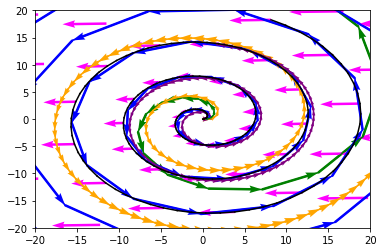

In [0]:
import matplotlib.pyplot as plt

r, p = 0, 0  # position
ur, up = 0, 0  # normalized position
rr, rp = 0, 0  # real (dynamic) position
urr, urp = 0, 0  # normalized real (dynamic) position
dr, dp = 0.5, 0.5  # differential
ex, ey = 0, 0  # evaluated position
uex, uey = 0, 0  # normalized evaluated position
k = 1  # normalized differential length
for i in range(100):
#   print(i)
  x, y = polar_to_cartesian([r, p])
  dx, dy = jacobian_matrix(*[r, p]).dot([dr, dp])
  rx, ry = polar_to_cartesian([rr, rp])
  rdx, rdy = jacobian_matrix(*[rr, rp]).dot([dr, dp])
  ld = lie_derivative([r, p], [dr, dp], [[0, 0], [0, 0]], [dr, dp])
  ldc = polar_to_cartesian(ld)
#   print(ld)
#   print(ldc)
#   cd = covariant_derivative([r, p], [dr, dp], [[0, 0], [0, 0]])
#   print(cd)
#   print(christoffel_symbols_2(r, p))
#   print(christoffel_symbols(r, p))
#   print(jacobian_matrix(*[r, p]))
#   print(jacobian_matrix_2(*[r, p]))
  # Differential normalizing
  length = polar_length([ur, up], [dr, dp])
#   length2 = polar_length_2([ur, up], [dr, dp])
#   length3 = polar_length_3([ur, up], [dr, dp])
#   print(length, length2 ,length3)
#   print(polar_length([ur, up], [udr, udp]))
#   print(cartesian_length(np.array([udx, udy])))
  udr = k * dr / length  # normalized differential
  udp = k * dp / length  # normalized differential
#   ddr = 0.001
#   ddp = 0.001
#   dudr_dr = (k * (dr + ddr) / polar_length([ur, up], [dr + ddr, dp]) - udr) / ddr
#   dudr_dp = (k * dr / polar_length([ur, up], [dr, dp + ddp]) - udr) / ddp
#   dudp_dr = (k * dp / polar_length([ur, up], [dr + ddr, dp]) - udp) / ddr
#   dudp_dp = (k * (dp + ddp) / polar_length([ur, up], [dr, dp + ddp]) - udp) / ddp
#   cd = covariant_derivative([ur, up], [udr, udp], [[dudr_dr, dudr_dp], [dudp_dr, dudp_dp]])
#   print(cd)
  ux, uy = polar_to_cartesian([ur, up])
  udx, udy = jacobian_matrix(*[ur, up]).dot([udr, udp])
  urx, ury = polar_to_cartesian([urr, urp])
  urdx, urdy = jacobian_matrix(*[urr, urp]).dot([udr, udp])
  # Plot
#   plt.quiver(ux, uy, udx, udy, color='purple', 
#              angles='xy', scale_units='xy', scale=1)
#   plt.quiver(x, y, dx, dy, color='b', 
#              angles='xy', scale_units='xy', scale=1)
  plt.quiver(x, y, ldc[0], ldc[1], color='magenta', 
             angles='xy', scale_units='xy', scale=1)
  plt.quiver(rx, ry, rdx, rdy, color='g', 
             angles='xy', scale_units='xy', scale=1)
  plt.quiver(urx, ury, urdx, urdy, color='orange', 
             angles='xy', scale_units='xy', scale=1)
  plt.quiver(ex, ey, dx, dy, color='b', 
             angles='xy', scale_units='xy', scale=1)
  plt.quiver(uex, uey, udx, udy, color='purple', 
             angles='xy', scale_units='xy', scale=1)
  plt.plot([ex, ex + dx], [ey, ey + dy], color='b')
  plt.plot([uex, uex + udx], [uey, uey + udy], color='purple')
  plt.plot([rx, rx + rdx], [ry, ry + rdy], color='g')
  plt.plot([urx, urx + urdx], [ury, ury + urdy], color='orange')
  ex += dx
  ey += dy
  uex += udx
  uey += udy
  r += dr
  p += dp
  ur += udr
  up += udp
  rr, rp = cartesian_to_polar([rx + rdx, ry + rdy])
  urr, urp = cartesian_to_polar([urx + urdx, ury + urdy])
# high res
r, p = 0, 0
dr, dp = 0.1, 0.1
for i in range(200):
  start = polar_to_cartesian([r + i * dr, p + i * dp])
  end = polar_to_cartesian([r + (i + 1) * dr, p + (i + 1) * dp])
  plt.plot(*zip(start, end), color='black')
plt.plot(x, y)
limit = 20
plt.xlim(-limit, limit)
plt.ylim(-limit, limit)
plt.show()

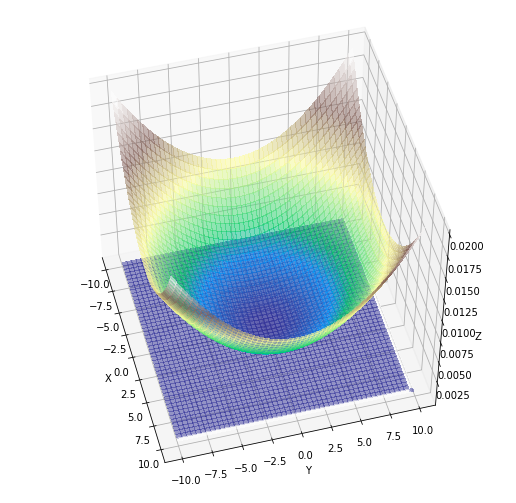

In [0]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
ax = plt.axes(projection='3d')

limit = 10
step = 0.1
def test_func(x, y):
  return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def test_func_2(x, y):
  m = x > y
  n = y > x
  p = y == x
  return x * m + y * n + p * 3

def polar_r(x, y):
    return (x ** 2 + y ** 2) ** 0.5

def polar_phi(x, y):
  return np.arctan2(y, x)

def metric_tensor(r, phi):
  return np.array([
      [1, 0],
      [0, r**2]
  ])

def ds(x, y):
  dx = np.array([[0.01 for a in b] for b in y])
  dy = np.array([[0.01 for a in b] for b in x])
  return dx**2 + dy**2

def pds(x, y):
  r = polar_r(x, y)
  phi = polar_phi(x, y)
  dr = np.array([[0.01 for a in b] for b in r])
  dp = np.array([[0.01 for a in b] for b in phi])
  return dr**2 + dp**2*r**2

def cartesian_x(r, phi):
  return r * np.cos(phi)

def cartesian_y(r, phi):
  return r * np.sin(phi)
  
x = y = np.arange(-limit, limit, step)
X, Y = np.meshgrid(x, y)
Z = ds(X, Y)
Z2 = pds(X, Y)
sf = ax.plot_surface(X, Y, Z, cmap='terrain', linewidth=0, antialiased=False, alpha=0.5, rcount=50, ccount=50)
sf2 = ax.plot_surface(X, Y, Z2, cmap='terrain', linewidth=0, antialiased=False, alpha=0.5, rcount=50, ccount=50)
# ct = ax.contour(X, Y, Z, levels=[10, 50, 100, 130], colors='black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(90, -90)
ax.view_init(50, -15)
plt.show()